In [49]:
import seaborn as sns
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
#from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import MinMaxScaler

Our task: find dataset for binary classification from Find another dataset for binary classification from [Kaggle](https://www.kaggle.com/). Use sklearn to build your own Logistic Regression model on the data and make some predictions. Which features are most important in the model you build?

Predict the employee's future in the company based on below data. 

A company's HR department wants to predict whether some customers would leave the company in next 2 years. Your job is to build a predictive model that predicts the prospects of future and present employee.

Perform EDA and bring out insights

Dummy Data Used For A Private Hackathon


In [50]:
df = pd.read_csv('C:/Users/oskri/project_employee/Employee.csv')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


There are 9 columns in dataframe:
 - 'Education': education of employee ['Bachelors', 'Masters', 'PHD']
 - 'JoiningYear': year in which the employee was hired [from 2012 to 2018]
 - 'City': city where the employee works ['Bangalore', 'Pune', 'New Delhi']
 - 'PaymentTier': three levels of payment tier [1, 2, 3]
 - 'Age':  current age of the employee
 - 'Gender': ['Male','Female']
 - 'EverBenched': ever kept out of projects for 1 month or more ['Yes', 'No']
 - 'ExperienceInCurrentDomain': experience in current field [from 0 to 7] years
 - 'LeaveOrNot': whether employee leaves the company in next 2 years ['0','1']

In [51]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    display (df[column].value_counts(dropna=False)) 
print('Check for missing data. Table with NaN values: ')
display(df[df.isnull().any(axis = 1)])#if there is NaN values

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
38    136
34    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

Male      2778
Female    1875
Name: Gender, dtype: int64

No     4175
Yes     478
Name: EverBenched, dtype: int64

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

Check for missing data. Table with NaN values: 


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot


 Above you can see information about the count of each unique value for each column in the dataset.
 
 
 Data cleared, no missing data, duplicates may be present.

Before making any machine learning model on a tabular dataset, normally we check whether there is a relation between the independant and target variables. This can be done by measuring the correlation between two variables.

First, let's encode our data and compile a table of Cramer's coefficients for each pair of categorical variables.

In [52]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_encoded = pd.DataFrame() 

for i in df.columns :
    df_encoded[i]=label.fit_transform(df[i])
df_encoded

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,12,1,0,0,0
1,0,1,2,0,6,0,0,3,1
2,0,2,1,2,16,0,0,2,0
3,1,4,0,2,5,1,0,5,1
4,1,5,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,1,0,2,4,0,0,4,0
4649,1,1,2,1,15,1,0,2,1
4650,1,6,1,2,5,1,0,5,1
4651,0,0,0,2,8,1,1,2,0


Cramér’s V is an effect size measurement for the chi-square test of independence. It measures how strongly two categorical fields are associated.

The effect size is calculated in the following manner:

 - Determine which field has the fewest number of categories.
 - Subtract 1 from the number of categories in this field.
 - Multiply the result by the total number of records.
 - Divide the chi-square value by the previous result. The chi-square value is obtained from the chi-square test of independence
 - Take the square root.
 
#### - if ES ≤ 0.2	The result is weak. Although the result is statistically significant, the fields are only weakly associated.
#### - if 0.2 < ES ≤ 0.6	The result is moderate. The fields are moderately associated.
#### - if ES > 0.6	The result is strong. The fields are strongly associated.

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.00,0.22,0.32,0.18,0.07,0.02,0.06,0.12,0.15
JoiningYear,0.22,1.00,0.20,0.27,0.07,0.15,0.14,0.05,0.42
City,0.32,0.20,1.00,0.30,0.07,0.21,0.03,0.07,0.21
PaymentTier,0.18,0.27,0.30,1.00,0.05,0.28,0.02,0.05,0.27
Age,0.07,0.07,0.07,0.05,1.00,0.06,0.07,0.56,0.09
Gender,0.02,0.15,0.21,0.28,0.06,1.00,0.02,0.02,0.22
EverBenched,0.06,0.14,0.03,0.02,0.07,0.02,1.00,0.04,0.08
ExperienceInCurrentDomain,0.12,0.05,0.07,0.05,0.56,0.02,0.04,1.00,0.05
LeaveOrNot,0.15,0.42,0.21,0.27,0.09,0.22,0.08,0.05,1.00


<AxesSubplot:>

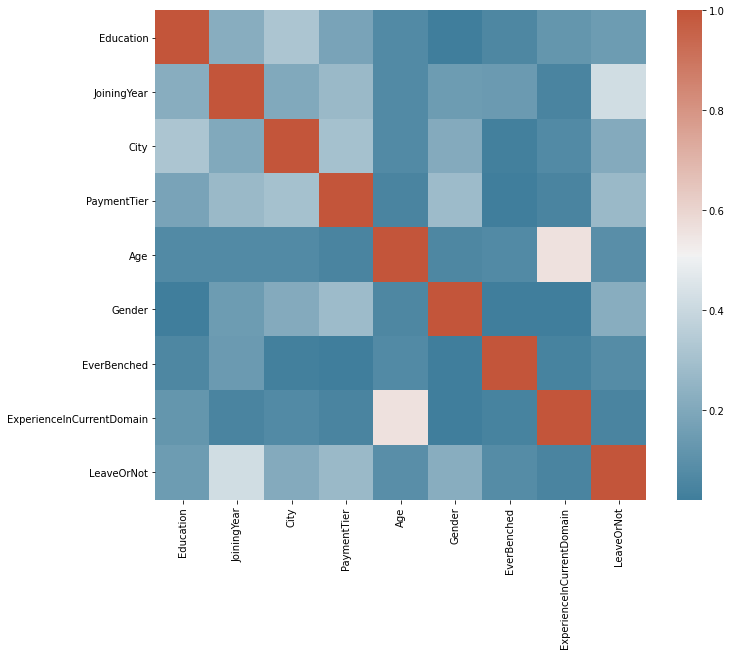

In [53]:
def cramer_V(feature1, feature2):
        n = min(len(feature1),len(feature2))
        crosstab =np.array(pd.crosstab(feature1, feature2, rownames=None, colnames=None)) # Cross table building
        n = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
        total_num = np.sum(crosstab) # Number of observations
        chi2 = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
        return (chi2/(total_num*n))**0.5
    
rows= []
for col1 in df_encoded:
    col = []
    for col2 in df_encoded:
        cramer = cramer_V(df_encoded[col1], df_encoded[col2]) # Cramer's V test
        col.append(round(cramer,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
cramers_tab = pd.DataFrame(cramers_results, columns = df_encoded.columns, index =df_encoded.columns)
display(cramers_tab)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cramers_tab, cmap = cmap)       
        

As we can see we have no features with strong assosiation. Maybe we should pay attention to the lightest cube: Age and ExperienceCurrentDomain. ES = 0.56, it's less then 0.6. So it's ok too. 

We don't need to normalize the dummy variables from one-hot-encoding. So we can start building the model

In [54]:
X = df_encoded.drop('LeaveOrNot', axis = 1) #features
y = df_encoded['LeaveOrNot'] #labels
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size=0.2, random_state=6)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.72      0.89      0.80       592
           1       0.67      0.41      0.51       339

    accuracy                           0.71       931
   macro avg       0.70      0.65      0.65       931
weighted avg       0.70      0.71      0.69       931



 Which features are most important in the model you build? 
 
 To answer this question, let's see what coefficients our features have in the model.

In [55]:
coef_df = pd.DataFrame(logmodel.coef_, columns = df.drop('LeaveOrNot', axis = 1).columns)
coef_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0.101084,0.189049,0.327719,-0.408825,-0.020731,-0.829398,0.592725,-0.052875


 The highest coefficient modulus is the 'Gerder' coefficient ( = -0.83). Let's make a barplot to see association between this feature and a target.
 
 Here, we see a trend that males rather prefer not to leave the company than females.

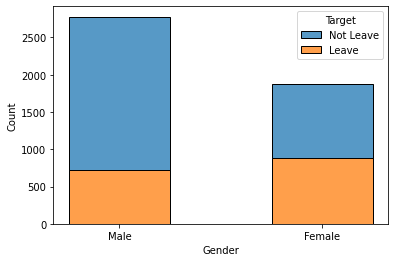

In [56]:
df['Target']=df.LeaveOrNot.apply(lambda x: 'Leave' if x==1 else 'Not Leave')
sns.histplot(df, x='Gender', hue='Target', multiple='stack', shrink=.5)
plt.show()

Сan also be plotted, association of other features that are also important (with smaller coefficients) and target. 'EverBenched' = 0.59 , 'PaymentTier' = -0.4

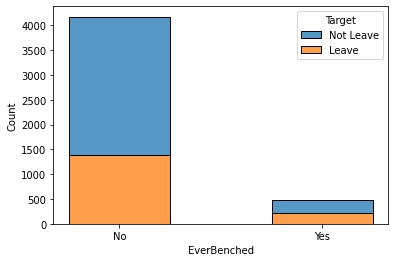

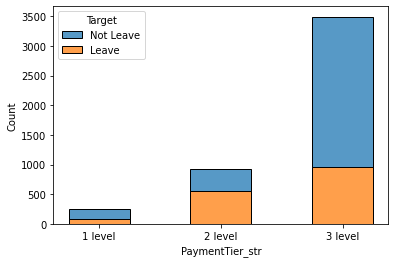

In [57]:
sns.histplot(df, hue='Target', x='EverBenched', multiple='stack', shrink=.5)
plt.show()
plt.clf()
df['PaymentTier_str']= df.PaymentTier.apply(lambda x: '1 level' if x == 1 else '2 level' if x==2 else '3 level')
df['PaymentTier_str'] = pd.Categorical(df['PaymentTier_str'], ['1 level','2 level','3 level'])
sns.histplot(df, hue='Target', x='PaymentTier_str', multiple='stack', shrink = 0.5)
plt.show()